# HDDA. Home Assignment 4

## Obective

4th home assignment is devoted to [Platt scaling](https://en.wikipedia.org/wiki/Platt_scaling) topic. 

Support Vector Machine (SVM) computes a decision function $f(x)$ such that $sign(f(x))$ can be used to predict the label of any test example $x$. Instead of predicting the label, many applications require a posterior class probability $Pr(y = 1|x)$. Platt proposes approximating the posterior by a sigmoid function.

## Plan

Home assignment consists of several parts.

- **SVC Demo**

sklearn [breast cancer](https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset) classification by using sklearn Support Vector Classifier posterior probabilities (plug-in Platt scaling)

- **Women’s Clothing E-Commerce dataset**

[Women’s Clothing E-Commerce](https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews/home) dataset classification by using you implementation of Platt scaling over Support Vector Classifier prediction.

### SVC Demo

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Load dataset

In [2]:
cancer = datasets.load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.1,random_state=1337)

Draw train data

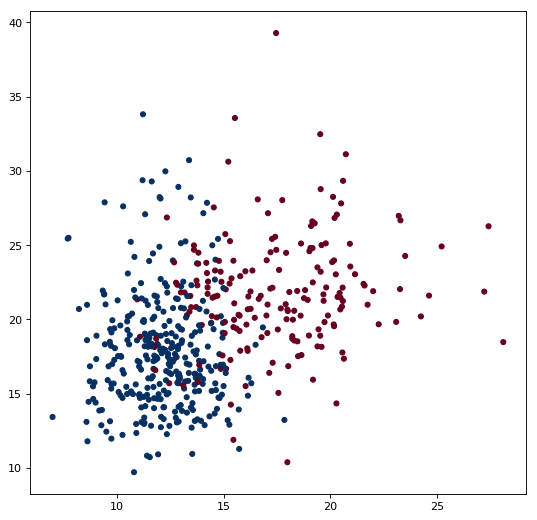

In [3]:
{plt.figure(figsize=(8, 8), dpi=80), plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20, cmap='RdBu')}
lim = plt.axis()

Create a svm Classifier and tain the model using the training sets

In [4]:
clf = SVC(kernel='linear', probability=True) # Linear Kernel
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Get posterior probabilities from SVC

In [5]:
y_pred = [0 if x[0]>0.5 else 1 for x in clf.predict_proba(X_test)]

Check confusion matrix

In [6]:
print(confusion_matrix(y_test, y_pred))

[[20  4]
 [ 0 33]]


Check classification report

In [7]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      0.83      0.91        24
          1       0.89      1.00      0.94        33

avg / total       0.94      0.93      0.93        57



Draw train (dimmed points), test (solid points), missclassified (yellow points)

{<matplotlib.collections.PathCollection at 0x7ff4f17a7160>,
 <Figure size 640x640 with 1 Axes>}

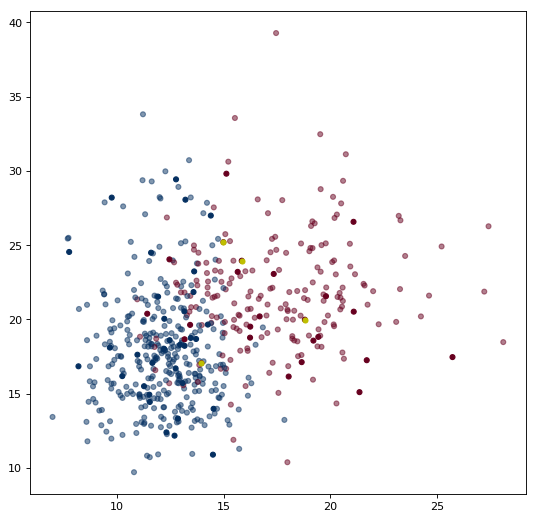

In [8]:
{plt.figure(figsize=(8, 8), dpi=80),
 plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20, cmap='RdBu', alpha=0.5),
 plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=20, cmap='RdBu'),
 plt.scatter(X_test[y_test!=y_pred, 0], X_test[y_test!=y_pred, 1], c='y', s=20)}

### Women’s Clothing E-Commerce dataset

This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:
- Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.
- Age: Positive Integer variable of the reviewers age.
- Title: String variable for the title of the review.
- Review Text: String variable for the review body.
- Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
- Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
- Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.
- Division Name: Categorical name of the product high level division.
- Department Name: Categorical name of the product department name.
- Class Name: Categorical name of the product class name.

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import pandas_profiling
from sklearn.svm import SVC
import re
from stop_words import get_stop_words
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
%matplotlib inline
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/mario/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/mario/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [42]:
df = pd.read_csv('/home/mario/hdda/ha4/Womens Clothing E-Commerce Reviews.csv')
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


#### 1. Prepare dataset for binary classification. Use two classes rating = 1, rating =  5. Ignore others entries.

In [43]:
top_N = 100
#convert list of list into text

a = df['Review Text'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)

#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]

In [44]:
df=df.dropna(axis=0,how='any')
rating_class = df[(df['Rating'] == 1) | (df['Rating'] == 5)]
X_review=rating_class['Review Text']
y=rating_class['Rating']

In [45]:
import string
def text_process(review):
    nopunc=[word for word in review if word not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
bow_transformer=TfidfVectorizer(analyzer=text_process).fit(X_review)
X_review = bow_transformer.transform(X_review)

#### 2. Split you dataset and train SVC with linear kernel

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_review, y, test_size=0.3, random_state=101)

svc = SVC(kernel='linear', probability=True)

svc.fit(X_train, y_train) 

y_pred = [1 if x[0]>0.5 else 5 for x in svc.predict_proba(X_test)]
print(confusion_matrix(y_test, y_pred))

[[ 127   72]
 [  34 3232]]


In [50]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          1       0.79      0.64      0.71       199
          5       0.98      0.99      0.98      3266

avg / total       0.97      0.97      0.97      3465



#### 3. Implement Platt scaling

In [126]:
from sys import argv
from math import log, exp
from random import randrange
from numpy import exp,zeros

# USE PARAMETERS YOU NEED TO FIT PLATT SCALING

def PlattScaling(X_train, y_train, y_pred):
    
    deci = svc.decision_function(X_train)
    
    #Count prior0 and prior1 
    prior1, prior0 = 0, 0
    for i in range(len(y_pred)):
        if y_pred[i] < 2:
            prior1+=1
        else:
            prior0+=1
    
    #Parameter Setting
    maxiter=100#Maximum number of iterations
    minstep=1e-10#Minimum step taken in line search
    sigma=1e-12#For numerically strict PD of Hessian
    eps=1e-5

    #Construct Target Support
    hiTarget=(prior1+1.0)/(prior1+2.0)
    loTarget=1/(prior0+2.0)
    length=prior1+prior0
    t=[]

    for i in range(length):
        if y_pred[i] < 2:
            t.append(hiTarget)
        else:
            t.append(loTarget)
            
    #Initial Point and Initial Fun Value
    A,B=0.0, log((prior0+1.0)/(prior1+1.0))
    fval = 0.0
    
    for i in range(length):
        fApB = deci[i]*A+B
        if fApB >= 0:
            fval += t[i]*fApB + log(1+exp(-fApB))
        else:
            fval += (t[i] - 1)*fApB +log(1+exp(fApB))

    for it in range(maxiter):
        #Update Gradient and Hessian (use H' = H + sigma I)
        h11=h22=sigma #Numerically ensures strict PD
        h21=g1=g2=0.0
        for i in range(length):
            fApB = deci[i]*A+B
            
            if (fApB >= 0):
                p=exp(-fApB)/(1.0+exp(-fApB))
                q=1.0/(1.0+exp(-fApB))
            else:
                p=1.0/(1.0+exp(fApB))
                q=exp(fApB)/(1.0+exp(fApB))
            d2=p*q
            h11+=deci[i]*deci[i]*d2
            h22+=d2
            h21+=deci[i]*d2
            d1=t[i]-p
            g1+=deci[i]*d1
            g2+=d1

        #Stopping Criteria
        if abs(g1)<eps and abs(g2)<eps:
            break
        
        #Finding Newton direction: -inv(H') * g
        det=h11*h22-h21*h21
        dA=-(h22*g1 - h21 * g2) / det
        dB=-(-h21*g1+ h11 * g2) / det
        gd=g1*dA+g2*dB

        #Line Search
        stepsize = 1
        while stepsize >= minstep:
            newA = A + stepsize * dA
            newB = B + stepsize * dB

            #New function value
            newf = 0.0
            for i in range(length):
                fApB = deci[i]*newA+newB
                if fApB >= 0:
                    newf += t[i]*fApB + log(1+exp(-fApB))
                else:
                    newf += (t[i] - 1)*fApB +log(1+exp(fApB))

            #Check sufficient decrease
            if newf < fval + 0.0001 * stepsize * gd:
                A, B, fval = newA, newB, newf
                break
            else:
                stepsize = stepsize / 2.0

        if stepsize < minstep:
            print ("line search fails",A,B,g1,g2,dA,dB,gd)
            A, B = [A,B]

    if it>=maxiter-1:
        print ("reaching maximal iterations",g1,g2)

    fApB = []
    for i in range(length):
        f = deci[i] * A + B
        fApB.append(f)
    
    
    prob=[]
    for i in range(length):
        if fApB[i]>0:
            prob.append(exp(-fApB[i])/(1.0+exp(-fApB[i])))
        else:
            prob.append(1.0/(1+exp(fApB[i])) )
 
    return prob

4. Classify test and calculate misclassification. Compare it with plug-in svc.predict_proba result.

In [128]:
y_proba_pred = [1 if x>0.5 else 5 for x in PlattScaling(X_test, y_test, y_pred)]

5. Represent your results.

In [129]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_proba_pred))    

[[ 125   74]
 [  34 3232]]


In [130]:
print(classification_report(y_test, y_proba_pred))

             precision    recall  f1-score   support

          1       0.79      0.63      0.70       199
          5       0.98      0.99      0.98      3266

avg / total       0.97      0.97      0.97      3465

